# 成为quant的必要条件之数学

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following table gives the substitution for different cases:

|Integral|	substitution|	$h(x)$ for  $\int_0^1h(x)dx$|
|---|---|---|
|\begin{equation*}\int_0^1g(x)dx\end{equation*}|No substitution| $h(x)=g(x)$|
|\begin{equation*}\int_a^bg(x)dx\end{equation*}|\begin{equation*}x=a+(b-a)y\end{equation*}|\begin{equation*}h(x)=(b-a)g\left(a+(b-a)y\right)\end{equation*}|
|\begin{equation*}\int_a^\infty g(x)dx\end{equation*}|\begin{equation*}x=\frac{1}{y}-1+a\end{equation*}|\begin{equation*}h(x)=\frac{g\left(\frac{1}{y}-1+a \right)}{y^2}\end{equation*}|
|\begin{equation*}\int_{-\infty}^b g(x)dx\end{equation*}|\begin{equation*}x=1-\frac{1}{y}+b\end{equation*}|\begin{equation*}h(x)=\frac{g\left(1-\frac{1}{y}+b \right)}{y^2}\end{equation*}|


###Practice: 
Calculate  $\int_{-4}^\infty\frac{1}{1+x^2}dx$

In [2]:
def mc_integration(a,size):
    y=np.random.rand(size)
    z=1/y-1+a
    hy=1/(1+z**2)/y**2
    return np.mean(hy)
    

In [3]:
mc_integration(-4,10000)

2.8758377982760845

Calculate  $\int_{-4}^4\frac{1}{1+x^2}dx$

In [4]:
def mc_inte(a,b,size):
    y=np.random.rand(size)
    z=a+(b-a)*y
    hy=(b-a)/(1+z**2)
    return np.mean(hy)

In [5]:
mc_inte(-4,4,10000)

2.6458973862995028

In [6]:
np.random.rand()

0.8445790427585613

In [7]:
np.random.normal(0,1)

1.0596186868736863

In [8]:
np.random.poisson(10)

9

In [9]:
np.random.exponential(10,2)

array([26.60746643,  8.9127965 ])

In [10]:
np.random.rand()

0.035594746628783924

In [11]:

def inverse(lam,size):
    u=np.random.rand(size)
    return -1/lam*np.log(u)
def compare(la,size):
    sample1=np.random.exponential(la,size)
    sample2=inverse(la,size)
    x=np.linspace(0.1,30,100000)
    y=la*np.exp(-la*x)
    plt.plot(x,y,label="Real Distribution",zorder=10)
    plt.hist(sample1,bins=300,density=True,label="Built-in Method",zorder=7)
    plt.hist(sample2,bins=300,density=True,label="Inverse Method",zorder=9)
    plt.legend()
    plt.show()

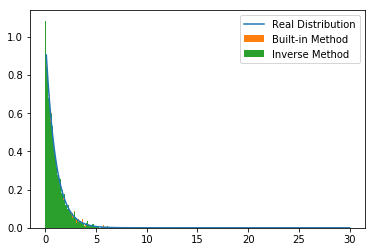

In [12]:
compare(1,10000)

In [13]:
#g(x)=1+x**2-x**3
def simple_function():
    y=np.random.rand(10000)
    hy=1+y**2-y**3
    return np.mean(hy)

In [14]:
simple_function()

1.0837782128612057

In [15]:
import sympy
y=sympy.Symbol('y')
sympy.integrate(1+y**2-y**3,(y,0,1))

13/12

In [59]:
13/12

1.0833333333333333

## HW02
### 自学Finite Difference Method，并用python写一个简单的ODE数值解(自己定义一个问题，并写出答案。)
（如果是直接参考网上的代码，请注明索引出处，否则一经发现本课程直接授予不合格。）
### Based on 10000 samples from a uniform distribution between 0 and 1,  <font color="blue">use Monte-Carlo integration to compute the following  </font >:

$\int_5^\infty \frac{1}{x^3}+\frac{1}{x^2} dx$
（不要复制最后我给的图，如果不会就写不会，没有任何关系。）

In [3]:
###Your code here:

It can be shown that the corresponding cumulative distribution function is :

$F(x;a,b)=\int _{{0}}^{{x}}f(\xi ;a,b)d\xi =1-(1-x^{a})^{b}.\ $

 -  Compute the inverse of the cdf given above.
  [Note: For this question, you can solve the inverse by hand or using sympy. <font color="green">If you solve it by hand, please present your derivation using text cell. </font>  <font color="blue">If you use sympy, please define $a$ and $b$ as symbols as well.  Solve $x$ as a function of CDF, $a$ and $b$. Do not plug in the value for $a$ and $b$. </font>]

 - <font color="blue"> Assume $a=2$ and $b=5$. Use Inverse transform sampling from a continuous distribution to generate 10000 sample from this distribution and plot the histogram of your simulation alongside the line plot of the pdf function.  Label the x axis and y axis, and also add a title to the graph. </font>  

In [7]:
#Hint: You may find Sympy useful
import sympy
a=sympy.Symbol('a')
b=sympy.Symbol('b')
print(sympy.integrate(2*a-3,(a,0,b)))
print(sympy.solve(2*a-b,b))

b**2 - 3*b
[2*a]


It should look like this:
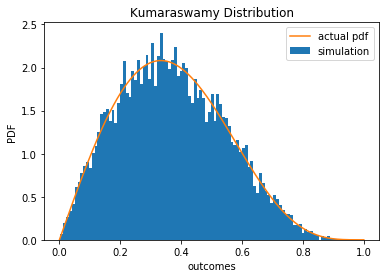

# 成为quant的必要条件之编程

In [4]:
#change problem
import numpy as np
def find_min_change(d,n):
    c=np.repeat(0,n+1)
    print_=np.repeat(0,n+1)
    for i in range(1,n+1):
        mincoin=np.inf
        address=0
        for j in range(len(d)):
            if i-d[j]>=0:
                if c[i-d[j]]+1<mincoin:
                    mincoin=c[i-d[j]]+1
                    address=j
        c[i]=mincoin
        print_[i]=address
    return c[n],print_
                
    

In [7]:
find_min_change([1,4,5,10],9)

(2, array([0, 0, 0, 0, 1, 2, 0, 0, 1, 1]))

In [8]:
def printcoin(d,n):
    totalnum,coinuse=find_min_change(d,n)
    i=0
    while(i<totalnum):
        i+=1
        print(f"{d[coinuse[n]]}")
        n-=d[coinuse[n]]

In [10]:
printcoin([1,4,5,10],12)

1
1
10


## random feature map

In [1]:
###
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm, metrics,datasets
from sklearn.model_selection import train_test_split

In [2]:
iris=datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
x=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
x.shape, X_test.shape

((150, 4), (38, 4))

In [5]:
def randomfeaturemap(dataset):
    N=dataset.shape[1]
    M=int(N*np.log(N))
    G=np.random.normal(0,1,M*N)
    G=G.reshape(M,N)
    return (np.sign(np.dot(G,dataset.T))/(M**0.5)).T

In [6]:
rx_train=randomfeaturemap(X_train)
rx_test=randomfeaturemap(X_test)
rx_test.shape

(38, 5)

In [8]:
def angular_kernel(x,y):
    dotproduct=sum([a*b for a,b in zip(x,y)])
    norm=np.linalg.norm(x,ord=2)*np.linalg.norm(y,ord=2)
    theta=np.arccos(dotproduct/norm)
    return 1-2*theta/np.pi

In [9]:
def my_kernel(X,Y):
    k=np.zeros([len(X),len(Y)])
    for i in range(len(X)):
        for j in range(len(Y)):
            k[i][j]=angular_kernel(X[i],Y[i])
    return k

In [10]:
model1=svm.SVC(kernel=my_kernel)
model1.fit(X_train,y_train)
y_p1=model1.predict(X_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p1))
print(y_test)
print(y_p1)


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


0.3157894736842105
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [11]:
model2=svm.SVC()
model2.fit(rx_train,y_train)
y_p2=model2.predict(rx_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p2))
print(y_test)
print(y_p2)


0.2894736842105263
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
model3=svm.SVC(kernel='rbf')
model3.fit(X_train,y_train)
y_p3=model3.predict(X_test)
#print(metrics.classification_report(y_test,y_p1))
#print(metrics.confusion_matrix(y_test,y_p1))
print(metrics.accuracy_score(y_test,y_p3))
print(y_test)
print(y_p3)


1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
def markovstock(p):
    while True:
        step=np.random.normal(0,1)
        p+=step
        if p>=0:
            yield p
        else:
            return

In [14]:
gen=markovstock(10)

In [15]:
trace=[]
for i in range(120):
    newp=next(gen)
    trace.append(newp)

In [16]:
trace

[10.2175426648372,
 10.652465635101898,
 9.356865216008934,
 9.894845961838277,
 9.192642786451387,
 9.861804894510811,
 9.49438293856341,
 8.30532254498706,
 9.618971506980103,
 8.441103798014447,
 5.873839585536988,
 5.221948875922991,
 4.458918708805989,
 3.0687820513427044,
 3.3366840348463995,
 1.951275040965908,
 4.327564407132316,
 6.118834446919111,
 5.924807023117786,
 6.250623394228202,
 4.995338235537361,
 3.8355794685981106,
 4.103974549920324,
 3.6770887251086415,
 2.9862905296203293,
 1.376894429934935,
 2.2816112883645783,
 3.083186531056812,
 2.16770564546642,
 2.67263464412285,
 2.3187649940315804,
 3.014750313737654,
 4.866391453930756,
 5.137161661068717,
 5.941813311542319,
 7.717975137011515,
 8.655092422744685,
 7.995014626376287,
 7.3217157622508395,
 8.305415302061064,
 8.70540943678878,
 9.366469618639133,
 9.846078348307117,
 10.389821912900233,
 12.706677477956244,
 14.198010730726956,
 13.46737347452768,
 12.151889475647442,
 13.234780642671746,
 13.25629208

## HW03
Investing for someone who knows the Future: You are given the prices of a stock for each of the next n days. You can buy once and sell once and you want to maximize your profit.

>Example  
Day 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16  
Price 70 90 40 27 69 80 13 50 35 75 51 53 56 10 15 41

 Questions:
 * How long does the naive algorithm take?
 * Can we improve this with divide and conquer?
 * Give a DP code

### How long does the naive algorithm take?

$$\sum_{i=1}^{n-1} (n-i) = O(n^2)$$

### Can we improve this with divide and conquer?

想不出怎么用分治法求解，下面是用递归法求解的code

In [19]:
ll = [70, 90, 40, 27, 69, 80, 13, 50, 35, 75, 51, 53, 56, 10, 15, 41]

In [22]:
def t(ll, profit):
    if len(ll) == 1:
        return profit
    for i in ll[1:]:
        if i-ll[0] > profit:
            profit = i-ll[0]
    return t(ll[1:], profit)

In [23]:
t(ll, 0)

62

### Give a DP code

不好意思，老师，我算法不太懂。。。

# 固定时间下的价值模型之一：MPT

Modern Portfolio Theory 现代投资组合理论：在给定收益r的情况下，使得投资组合的方差最小。

投资组合：即在给定的股票池中每只股票的权重（权重为0表示不投资）

# 固定时间下的价值模型之二：CAPM及因子模型

## 效用函数Utility Function
$$ U=E(r)-0.5A\sigma^2 $$

A是超参数，A越大，代表投资者越厌恶风险。

在给定A和U的情况下，可以绘制出等效用曲线。

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
A=2
sigma=np.arange(0.5, 2, 0.1)

In [39]:
def Er(sigma, U):
    return U+sigma**2

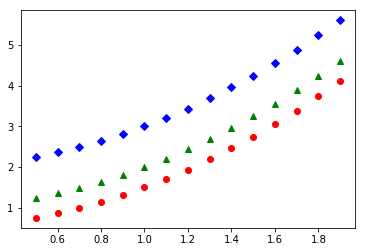

In [48]:
plt.plot(sigma, Er(sigma, 0.5), 'ro',
        sigma, Er(sigma, 1), 'g^',
        sigma, Er(sigma, 2), 'bD')

## 资本市场线(Capital Market Line，简称CML)
是指表明有效组合的期望收益率和标准差之间的一种简单的线性关系的一条射线。它是沿着投资组合的有效边界，由风险资产和无风险资产构成的投资组合。

## 证券市场线（SML）
资本资产定价模型（CAPM）的图示形式称为证券市场线（SML）。它主要用来说明投资组合报酬率与系统风险程度β系数之间的关系。SML揭示了市场上所有风险性资产的均衡期望收益率与风险之间的关系。

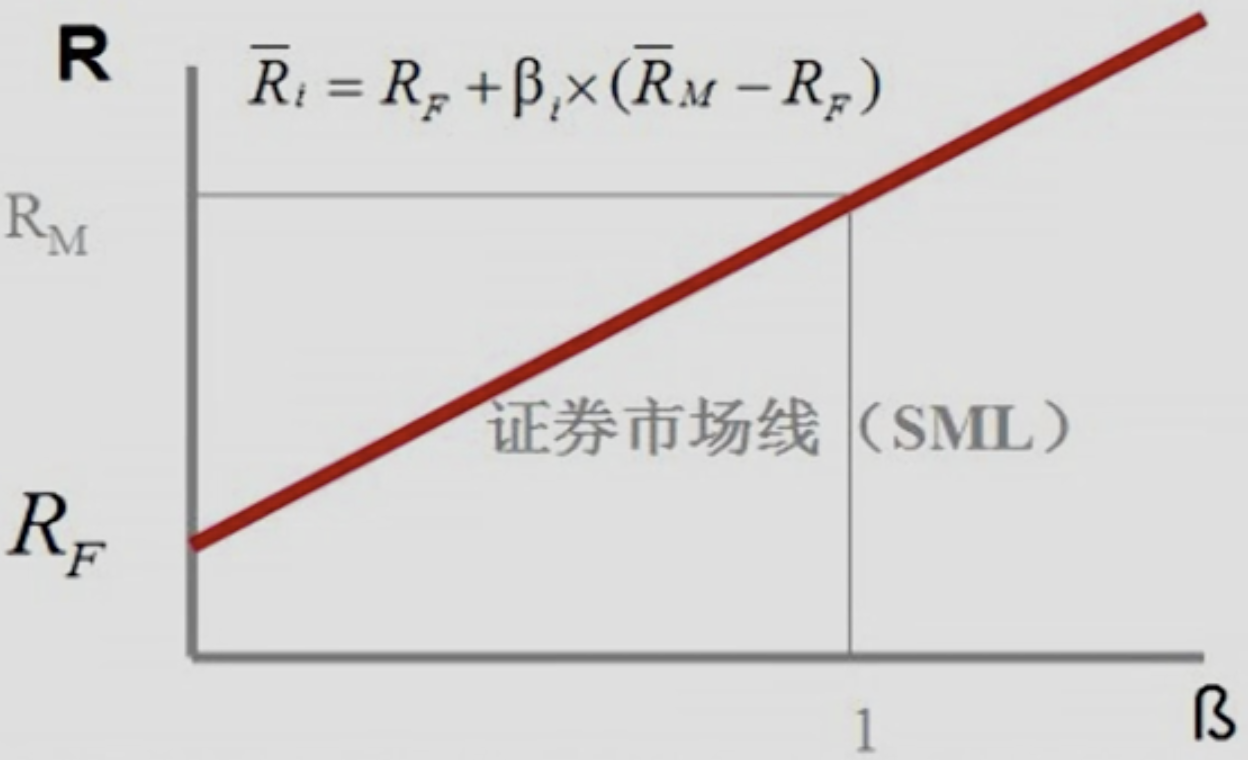

### β系数的意义
证券市场线描述的则是市场均衡条件下单项资产或资产组合（不论它是否已经有效分散风险）的期望收益与风险之间的关系。测度风险工具是单项资产或资产组合对于整个市场组合方差的贡献程度，即β系数。　它告诉我们相对于市场组合而言特定资产的系统风险是多少。

In [27]:
#!pip install cvxopt
!pip freeze | grep cvxopt

cvxopt==1.2.3


In [28]:
import numpy as np
import cvxopt
import pandas as pd
from cvxopt import matrix
import matplotlib.pyplot as plt

In [29]:
ri=pd.read_csv('ri-Copy1.csv')

In [30]:
part=ri.iloc[:,1:4]
part.head()

,MSFT,AAPL,AMZN
0,-0.003428,-0.001542,-0.011446
1,0.013575,0.014423,0.019319
2,0.003161,0.003287,0.013762
3,0.013140,0.003594,-0.001678
4,0.008280,0.019473,0.000955


In [31]:
part.describe()

,MSFT,AAPL,AMZN
count,99.000000,99.000000,99.000000
mean,0.001456,0.001705,0.001524
std,0.016689,0.020776,0.022822
min,-0.041714,-0.099650,-0.058656
25%,-0.005037,-0.006136,-0.008319
50%,0.001428,0.002799,0.001760
75%,0.009118,0.009958,0.012222
max,0.068281,0.070451,0.094452


In [32]:
r=part.describe().loc['mean']

In [33]:
sigma=part.cov()
sigma

,MSFT,AAPL,AMZN
MSFT,0.000279,0.000275,-0.000024
AAPL,0.000275,0.000432,-0.000026
AMZN,-0.000024,-0.000026,0.000521


In [34]:
def draw_ef():
    P=matrix(sigma.values,tc='d')
    q=matrix(np.array([0,0,0]),tc='d')
    G=matrix(np.zeros((3,3)))
    h=matrix(np.zeros(3))
    A=matrix(np.array([r,np.ones(3)]))
    rate=np.linspace(0.0008,0.005,100)
    si=[]
    for i in rate:
        b=matrix(np.array([i,1]))
        sol =  cvxopt.solvers.qp(P, q, G, h, A, b)
        si.append(2*float(sol["primal objective"]))
    plt.plot(si,rate)
        

     pcost       dcost       gap    pres   dres
 0:  6.8001e-04  6.8001e-04  3e+00  2e+00  2e-19
 1:  6.8001e-04  6.8001e-04  3e-02  2e-02  6e-19
 2:  6.8001e-04  6.8001e-04  3e-04  2e-04  7e-19
 3:  6.8001e-04  6.8001e-04  3e-06  2e-06  3e-19
 4:  6.8001e-04  6.8001e-04  3e-08  2e-08  6e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.0857e-04  6.0857e-04  3e+00  2e+00  3e-19
 1:  6.0857e-04  6.0857e-04  3e-02  2e-02  5e-19
 2:  6.0857e-04  6.0857e-04  3e-04  2e-04  2e-19
 3:  6.0857e-04  6.0857e-04  3e-06  2e-06  1e-19
 4:  6.0857e-04  6.0857e-04  3e-08  2e-08  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  5.4169e-04  5.4169e-04  3e+00  2e+00  3e-19
 1:  5.4169e-04  5.4169e-04  3e-02  2e-02  3e-19
 2:  5.4169e-04  5.4169e-04  3e-04  2e-04  5e-19
 3:  5.4169e-04  5.4169e-04  3e-06  2e-06  3e-19
 4:  5.4169e-04  5.4169e-04  3e-08  2e-08  2e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

 4:  1.4300e-02  1.4300e-02  3e-08  2e-08  5e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.4662e-02  1.4662e-02  3e+00  2e+00  2e-18
 1:  1.4662e-02  1.4662e-02  3e-02  2e-02  2e-18
 2:  1.4662e-02  1.4662e-02  3e-04  2e-04  1e-18
 3:  1.4662e-02  1.4662e-02  3e-06  2e-06  1e-18
 4:  1.4662e-02  1.4662e-02  3e-08  2e-08  7e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5030e-02  1.5030e-02  3e+00  2e+00  2e-18
 1:  1.5030e-02  1.5030e-02  3e-02  2e-02  3e-18
 2:  1.5030e-02  1.5030e-02  3e-04  2e-04  2e-18
 3:  1.5030e-02  1.5030e-02  3e-06  2e-06  5e-18
 4:  1.5030e-02  1.5030e-02  3e-08  2e-08  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.5401e-02  1.5401e-02  3e+00  2e+00  7e-19
 1:  1.5401e-02  1.5401e-02  3e-02  2e-02  2e-18
 2:  1.5401e-02  1.5401e-02  3e-04  2e-04  4e-18
 3:  1.5401e-02  1.5401e-02  3e-06  2e-06  3e-18
 4:  1.5401e-02  1.5401e-02  3e-08  2e-08  1e-18


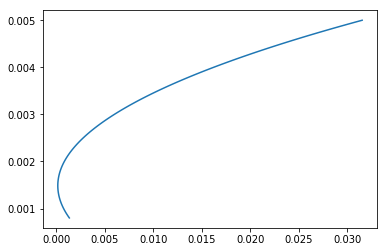

In [35]:
draw_ef()

## hw04: 自己写一个Positive Alpha策略

参考链接：https://blog.csdn.net/matrix_laboratory/article/details/50982978

资本资产定价模型（Capital Asset Pricing Model，CAPM)：是由美国学者夏普（William Sharpe）、林特尔（John Lintner）、特里诺（Jack Treynor）和莫辛（Jan Mossin）等人于1964年在资产组合理论的基础上发展起来的，是现代金融市场价格理论的支柱，广泛应用于投资决策和公司理财领域。

CAPM核心理念为：资产组合的收益与系统风险呈正相关，它所承担的风险将会获得与市场平均回报相对应的风险溢价补偿。

### Alpha投资模型

Alpha，实际上是指某个股票或股票组合相对于比较基准(通常指市场指数)的超额收益。

Alpha策略来源于CAPM模型。在CAPM模型中，投资组合的收益率等于无风险利率加上风险溢价，只有多承担风险才能获得更高的收益。资产的收益主要取决于beta值，beta越高，期望收益相对越高，beta越低，期望收益相对越低。

在CAPM模型的基础上，詹森提出了新的指标——詹森指数（也称Alpha值），来衡量基金的业绩，具体公式如下：

`α=Ri−Rf−βi∗(E(Rm)−Rf)`

　　α>0，表示一基金或股票的价格可能被低估，建议买入。亦即表示该基金或股票以投资技术获得平均比预期回报大的实际回报。

　　α<0，表示一基金或股票的价格可能被高估，建议卖空。亦即表示该基金或股票以投资技术获得平均比预期回报小的实际回报。

　　α=0，表示一基金或股票的价格准确反映其内在价值，未被高估也未被低估。亦即表示该基金或股票以投资技术获得平均与预期回报相等的实际回报。

假设有一投资组合，通过对其的风险水平分析，资本资产定价模型预测其每年回报率为14％。但是该投资组合的实际回报率为每年19％。此时，这个投资组合的α系数为5％（19％－14％），即表示该组合的实际回报率超过由资本资产定价模型预测的回报率5个百分点。

Alpha策略： 
所谓获取alpha收益就是采用期指等工具对冲资产组合。 
这样就可以避免市场波动对投资项目的影响。 


# 固定时间下的价值模型之三：多因子模型及APT

## HW06

>写一个多指数套利模型。  
提示步骤：  
1） 做一个120只股票组成得资产组合ri  
2） 选取因素，常见因素RM, RI, RX  
3） 判断你所选取得这些因素是否存在多重共线性，是否需要做PCA  
4） 判断你所选取得这些因素能否交易  
5） 根据历史数据估计出多因素模型  
6） 判断当前收益率是否存在套利机会  
7） 如果存在，请写出套利方法，并判断每一步套利实施过程是否能实现（β是否相等）  
8） 回测你的模型，看看是否稳定。

可以使用任何软件，任何数据库，如有引用请备注索引。


# 动态时间下的价值模型：BSM（上）

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mmm=pd.read_csv('MMM.csv',index_col=0,usecols=[0,5])

In [3]:
len(mmm)

1258

In [4]:
mmm.head(2)

,Adj Close
Date,
2014-06-17,126.359230
2014-06-18,126.922089


In [5]:
train=mmm[0:1006]

In [6]:
test=mmm[1006:]

In [9]:
rate=train.pct_change()[1:]

In [10]:
rate.describe()

,Adj Close
count,1005.000000
mean,0.000509
std,0.010605
min,-0.068325
25%,-0.003928
50%,0.000598
75%,0.005736
max,0.059129


In [8]:
mu=rate.describe().loc['mean']*252

In [9]:
sigma=rate.describe().loc['std']*np.sqrt(252)

In [10]:
mu

Adj Close    0.128193
Name: mean, dtype: float64

In [11]:
sigma

Adj Close    0.168347
Name: std, dtype: float64

In [12]:
test[0:1]['Adj Close']

Date
2018-06-14    197.830109
Name: Adj Close, dtype: float64

In [13]:
def trace():
    delta=1/251
    s0=197.830109
    result=np.repeat(s0,252)
    for i in range(1,252):
        s1=s0*(1+mu*delta+sigma*delta**0.5*np.random.normal())
        result[i]=s1
        s0=s1
    return result

In [14]:
simulation=trace()

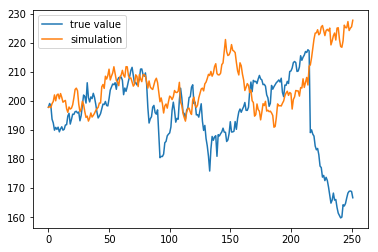

In [17]:
plt.plot(test.values,label='true value')
plt.plot(simulation,label='simulation')
plt.legend()

In [18]:
def sumulate():
    plt.plot(test.values,label="true")
    
    for i in range(5):
        plt.plot(trace())
    plt.legend()
    plt.show()
    


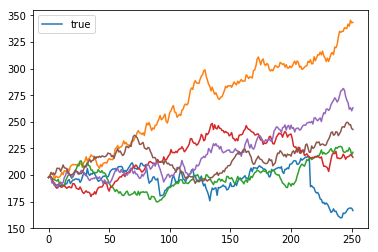

In [19]:
sumulate()

## hw07

### 1) 模仿课程代码，写连续模型的股票价格布朗运动模拟

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
mmm=pd.read_csv('MMM.csv',index_col=0,usecols=[0,5])

In [13]:
len(mmm)

1258

In [14]:
mmm.head(2)

,Adj Close
Date,
2014-06-17,126.359230
2014-06-18,126.922089


In [15]:
train=mmm[0:1006]

In [16]:
test=mmm[1006:]

In [17]:
rate=train.pct_change()[1:]

In [18]:
rate.describe()

,Adj Close
count,1005.000000
mean,0.000509
std,0.010605
min,-0.068325
25%,-0.003928
50%,0.000598
75%,0.005736
max,0.059129


In [19]:
mu=rate.describe().loc['mean']*252

In [20]:
sigma=rate.describe().loc['std']*np.sqrt(252)

In [21]:
mu

Adj Close    0.128193
Name: mean, dtype: float64

In [22]:
sigma

Adj Close    0.168347
Name: std, dtype: float64

In [23]:
test[0:1]['Adj Close']

Date
2018-06-14    197.830109
Name: Adj Close, dtype: float64

In [31]:
v = mu - sigma**2/2
v

Adj Close    0.114023
dtype: float64

In [33]:
def trace():
    delta=1/251
    s0=197.830109
    result=np.repeat(s0,252)
    for i in range(1,252):
        s1=s0*np.exp(v*delta + sigma * delta**0.5*np.random.normal())
        result[i]=s1
        s0=s1
    return result

In [36]:
simulation=trace()

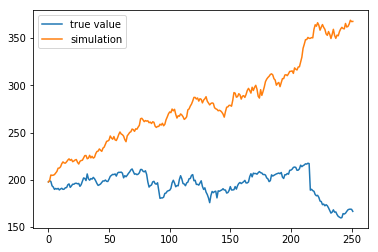

In [37]:
plt.plot(test.values,label='true value')
plt.plot(simulation,label='simulation')
plt.legend()

In [38]:
def sumulate():
    plt.plot(test.values,label="true")
    
    for i in range(5):
        plt.plot(trace())
    plt.legend()
    plt.show()
    


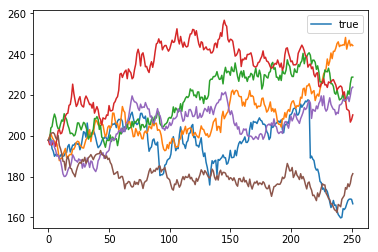

In [39]:
sumulate()

### 2) 课程是为了展示直观，请思考课程代码有哪些缺点，复杂度（空间和时间）是怎么样的，有没有修改方法（空间和时间）。


课堂上提到的generator的思路可以在空间上做优化

### 3) 小明指出，通过运行n次布朗运动随机路径模拟，在每个时间点对这n个路径求平均，以此作为在该时间点的价格预测。
1. 论证这种思想的问题（数学上）
2. 论证这种思想的问题（金融意义上）
3. 论证这种思想在哪些情况其实还是可以用一用的（提示：从iid角度思考）

1. 假设n趋向于无穷大，根据大数定理，那么取平均就是正态分布的期望值，是一个固定值
1. 感觉就是模型本来就是随机的，求平均意义不大
1. 在求分布的均值时可以运用。